#LOAD THE DATA

download from here:

https://mega.nz/folder/ZdQGmK6b#-0hoBWc5fLYuxQuH25feXg

Import libraries

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sqlalchemy import create_engine
from sqlalchemy import create_engine, MetaData, Table, Column, Integer, String, Float, Text


In [ ]:

# Load the dataset
df = pd.read_csv('debate2019.csv')
df.head(5)

,Full-Document,Citation,Extract,Abstract,#CharsDocument,#CharsAbstract,#CharsExtract,#WordsDocument,#WordsAbstract,#WordsExtract,AbsCompressionRatio,ExtCompressionRatio,OriginalDebateFileName
0,The Trump Administration has been quietly fund...,Hunt 18 Edward Hunt writes about war and empir...,The Trump Administration has been quietly fund...,This file was produced by the following studen...,5041,147,2106,788,25,326,0.031726,0.413706,Mexico Honduras - Wake 2019.html5
1,The border between the United States and Mexic...,"Monzo et al 17. Lilia D. Monzó, associate pro...",The border between the United States and Mexic...,Imperialism in Mexico is not just a one-off in...,9849,431,4481,1559,71,693,0.045542,0.444516,Mexico Honduras - Wake 2019.html5
2,Today we face a planetary crisis. Environmenta...,Helland and Lindgren 16 Leonardo E. Figueroa H...,Today we face a planetary crisis. Environmenta...,The will of dominion over Mexico is supplanted...,20340,698,8956,2660,109,1200,0.040977,0.451128,Mexico Honduras - Wake 2019.html5
3,"“They talk to me about progress, about ‘achiev...","Lystrup 15. Lauren; University of California, ...","They talk about progress, achievements,’ disea...",Death is not a symptom or consequence of moder...,8774,425,4818,1272,63,701,0.049528,0.551101,Mexico Honduras - Wake 2019.html5
4,The Zapatista movement has garnered much atten...,"Lystrup 15. Lauren, University of California, ...",The Zapatista movement garnered attention in t...,Plan: The United States federal government sho...,6955,161,3522,1023,23,510,0.022483,0.498534,Mexico Honduras - Wake 2019.html5


#EXPLORE DATA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19057 entries, 0 to 19056
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Full-Document           19057 non-null  object 
 1   Citation                19057 non-null  object 
 2   Extract                 19057 non-null  object 
 3   Abstract                19057 non-null  object 
 4   #CharsDocument          19057 non-null  int64  
 5   #CharsAbstract          19057 non-null  int64  
 6   #CharsExtract           19057 non-null  int64  
 7   #WordsDocument          19057 non-null  int64  
 8   #WordsAbstract          19057 non-null  int64  
 9   #WordsExtract           19057 non-null  int64  
 10  AbsCompressionRatio     19057 non-null  float64
 11  ExtCompressionRatio     19057 non-null  float64
 12  OriginalDebateFileName  19057 non-null  object 
dtypes: float64(2), int64(6), object(5)
memory usage: 1.9+ MB


statistical summary

In [ ]:
df.describe()

,#CharsDocument,#CharsAbstract,#CharsExtract,#WordsDocument,#WordsAbstract,#WordsExtract,AbsCompressionRatio,ExtCompressionRatio
count,19057.000000,19057.000000,19057.000000,19057.000000,19057.000000,19057.000000,19057.000000,19057.000000
mean,3924.182033,104.904340,1450.711445,615.153067,16.189589,226.957181,0.072497,0.458851
std,4901.799047,91.408292,1483.013472,759.247243,14.148261,231.108251,0.104213,0.197925
min,106.000000,14.000000,34.000000,20.000000,4.000000,11.000000,0.000122,0.002656
25%,1004.000000,57.000000,484.000000,156.000000,9.000000,76.000000,0.016471,0.310082
50%,2526.000000,83.000000,1028.000000,396.000000,13.000000,162.000000,0.034431,0.439490
75%,5215.000000,122.000000,1906.000000,819.000000,19.000000,299.000000,0.080808,0.590909
max,227585.000000,3526.000000,23560.000000,32761.000000,530.000000,3693.000000,0.992188,0.998400


check missing values

In [ ]:
df.isnull().sum()

Full-Document             0
Citation                  0
Extract                   0
Abstract                  0
#CharsDocument            0
#CharsAbstract            0
#CharsExtract             0
#WordsDocument            0
#WordsAbstract            0
#WordsExtract             0
AbsCompressionRatio       0
ExtCompressionRatio       0
OriginalDebateFileName    0
dtype: int64

#CLEAN THE DATA


duplicates

In [ ]:
print(df.columns.tolist())

['Full-Document', 'Citation', 'Extract', 'Abstract', '#CharsDocument', '#CharsAbstract', '#CharsExtract', '#WordsDocument', '#WordsAbstract', '#WordsExtract', 'AbsCompressionRatio', 'ExtCompressionRatio', 'OriginalDebateFileName']


In [ ]:
df_duplicates=df[df[['Full-Document', 'Citation', 'Extract', 'Abstract', '#CharsDocument', '#CharsAbstract', '#CharsExtract', '#WordsDocument', '#WordsAbstract', '#WordsExtract', 'AbsCompressionRatio', 'ExtCompressionRatio', 'OriginalDebateFileName']].duplicated() == True]
df_duplicates

,Full-Document,Citation,Extract,Abstract,#CharsDocument,#CharsAbstract,#CharsExtract,#WordsDocument,#WordsAbstract,#WordsExtract,AbsCompressionRatio,ExtCompressionRatio,OriginalDebateFileName


remove unnecessary columns

#TEXT PREPROCESSING:

Given our dataset, we will focus on the column 'Full-Document' for text processing.

Lowercasing

In [ ]:
df['Full-Document'] = df['Full-Document'].str.lower()
df['Extract'] = df['Extract'].str.lower()


Tokenization

In [ ]:
nltk.download('punkt')
df['Tokens'] = df['Full-Document'].apply(nltk.word_tokenize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Removing stop words

In [ ]:

nltk.download('stopwords')
stop = set(stopwords.words('english'))
df['Filtered'] = df['Tokens'].apply(lambda x: [item for item in x if item not in stop])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Stemming/Lemmatisation

In [ ]:
stemmer = PorterStemmer()
df['Stemmed'] = df['Filtered'].apply(lambda x: [stemmer.stem(y) for y in x])


removing special characters and numbers

In [ ]:
df['Cleaned'] = df['Stemmed'].apply(lambda x: [item for item in x if item.isalpha()])


In [ ]:
df.head()

,Full-Document,Citation,Extract,Abstract,#CharsDocument,#CharsAbstract,#CharsExtract,#WordsDocument,#WordsAbstract,#WordsExtract,AbsCompressionRatio,ExtCompressionRatio,OriginalDebateFileName,Tokens,Filtered,Stemmed,Cleaned
0,the trump administration has been quietly fund...,Hunt 18 Edward Hunt writes about war and empir...,the trump administration has been quietly fund...,This file was produced by the following studen...,5041,147,2106,788,25,326,0.031726,0.413706,Mexico Honduras - Wake 2019.html5,"[the, trump, administration, has, been, quietl...","[trump, administration, quietly, funding, mexi...","[trump, administr, quietli, fund, mexican, gov...","[trump, administr, quietli, fund, mexican, gov..."
1,the border between the united states and mexic...,"Monzo et al 17. Lilia D. Monzó, associate pro...",the border between the united states and mexic...,Imperialism in Mexico is not just a one-off in...,9849,431,4481,1559,71,693,0.045542,0.444516,Mexico Honduras - Wake 2019.html5,"[the, border, between, the, united, states, an...","[border, united, states, mexico, heavily, guar...","[border, unit, state, mexico, heavili, guard, ...","[border, unit, state, mexico, heavili, guard, ..."
2,today we face a planetary crisis. environmenta...,Helland and Lindgren 16 Leonardo E. Figueroa H...,today we face a planetary crisis. environmenta...,The will of dominion over Mexico is supplanted...,20340,698,8956,2660,109,1200,0.040977,0.451128,Mexico Honduras - Wake 2019.html5,"[today, we, face, a, planetary, crisis, ., env...","[today, face, planetary, crisis, ., environmen...","[today, face, planetari, crisi, ., environment...","[today, face, planetari, crisi, environment, e..."
3,"“they talk to me about progress, about ‘achiev...","Lystrup 15. Lauren; University of California, ...","they talk about progress, achievements,’ disea...",Death is not a symptom or consequence of moder...,8774,425,4818,1272,63,701,0.049528,0.551101,Mexico Honduras - Wake 2019.html5,"[“, they, talk, to, me, about, progress, ,, ab...","[“, talk, progress, ,, ‘, achievements, ,, ’, ...","[“, talk, progress, ,, ‘, achiev, ,, ’, diseas...","[talk, progress, achiev, diseas, cure, improv,..."
4,the zapatista movement has garnered much atten...,"Lystrup 15. Lauren, University of California, ...",the zapatista movement garnered attention in t...,Plan: The United States federal government sho...,6955,161,3522,1023,23,510,0.022483,0.498534,Mexico Honduras - Wake 2019.html5,"[the, zapatista, movement, has, garnered, much...","[zapatista, movement, garnered, much, attentio...","[zapatista, movement, garner, much, attent, pa...","[zapatista, movement, garner, much, attent, pa..."


In [ ]:
df_cleaned=df

#SAVE PROCESSED DATA

Save to csv

In [ ]:
df.to_csv('CleanDatasetChatbot.csv', index=False)


In [ ]:
df = pd.read_csv('CleanDatasetChatbot.csv')

#BUILD DATABASE PIPELINE

In [ ]:
#code to make the database split into 5 , make it smaller for storage
import pandas as pd

# Read the dataset
df = pd.read_csv('debate2019.csv')

# Split the dataset into five parts
chunk_size = len(df) // 5
chunk1 = df[:chunk_size]
chunk2 = df[chunk_size:2*chunk_size]
chunk3 = df[2*chunk_size:3*chunk_size]
chunk4 = df[3*chunk_size:4*chunk_size]
chunk5 = df[4*chunk_size:]

# Save each chunk to separate files
chunk1.to_csv('chunk1.csv', index=False)
chunk2.to_csv('chunk2.csv', index=False)
chunk3.to_csv('chunk3.csv', index=False)
chunk4.to_csv('chunk4.csv', index=False)
chunk5.to_csv('chunk5.csv', index=False)


terminal:

In [ ]:
pip install sqlalchemy


Since the 'Tokens', 'Filtered', 'Stemmed', and 'Cleaned' columns contain lists (which they do because of tokenization and other preprocessing steps we have done earlier), I will join these lists into strings before inserting the data into the SQL database.

In [ ]:
columns_to_convert = ['Tokens', 'Filtered', 'Stemmed', 'Cleaned']

for column in columns_to_convert:
    df_cleaned[column] = df_cleaned[column].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


Create a Database and Tables with SQLAlchemy


In [ ]:

# Define the engine to connect to the SQLite database.
engine = create_engine('sqlite:///chatbot_data.db')

metadata = MetaData()

# Define the schema for the 'documents' table.
documents_table = Table('documents', metadata,
                        Column('id', Integer, primary_key=True),
                        Column('FullDocument', Text),
                        Column('Citation', Text),
                        Column('Extract', Text),
                        Column('Abstract', Text),
                        Column('CharsDocument', Integer),
                        Column('CharsAbstract', Integer),
                        Column('CharsExtract', Integer),
                        Column('WordsDocument', Integer),
                        Column('WordsAbstract', Integer),
                        Column('WordsExtract', Integer),
                        Column('AbsCompressionRatio', Float),
                        Column('ExtCompressionRatio', Float),
                        Column('OriginalDebateFileName', String)
                        )

# Create the table in the specified database.
metadata.create_all(engine)


Insert data into the table

In [ ]:
df.to_sql('debates', con=engine, if_exists='replace', index_label='id')

19057

Database Schema

In [ ]:
from IPython.display import IFrame

# Embedding the diagram within an IFrame, which will work in some cases depending on the Jupyter notebook's configuration
display(IFrame(src='https://dbdiagram.io/e/65db79cb5cd0412774c38b95/65db7e895cd0412774c3b8b5', width=560, height=315))


Insert Data to SQL

In [ ]:
engine = create_engine('sqlite:///chatbot_data.db')
df.to_sql('chatbot_data', con=engine, if_exists='replace', index=False)


19057

Have a look at the data

In [ ]:
from sqlalchemy import create_engine, select, MetaData

metadata = MetaData()
metadata.reflect(bind=engine)

# Get the table object
table = metadata.tables['chatbot_data']

# Start a connection to the database
with engine.connect() as conn:
    # Prepare SELECT statement
    select_st = select(table)

    # Execute SELECT statement and fetch results
    result = conn.execute(select_st)

    # Fetch and print a few rows to check if it worked
    for row in result.fetchmany(size=5):
        print(row)


('The Trump Administration has been quietly funding the Mexican government’s ongoing drug war, intensifying a conflict that claimed nearly 20,000 lives ... (4743 characters truncated) ... intensify the drug war, Trump is working to ensure that the people who suffer unfairly from it will never be able to find refuge inthe United States.', 'Hunt 18 Edward Hunt writes about war and empire. He has a PhD in American Studies from the College of William and Mary, “Trump’s Hidden Hand in Mexico’ Drug War,” April 7, 2018, https://progressive.org/dispatches/trumps-hidden-hand-in-mexicos-drug-war/)', 'The Trump Administration has been quietly funding the Mexican government’s ongoing drug war, intensifying a conflict that claimed nearly 20,000 lives ... (1808 characters truncated) ... intensify the drug war, Trump is working to ensure that the people who suffer unfairly from it will never be able to find refuge inthe United States.', 'This file was produced by the following students from the 2019 

#For prototype:
###Select the 2 subjects that appear the most and feed that data to the API in order to not overload the model or use too many tokens. We will also fine tune a model with this data.

These will be the 2 subjects that appear the most in the document. We will look at the occurance of words (stop words not included), the number of times the same file name is detected, etc. to figure out which subbjects they are.

In [ ]:
import pandas as pd
import nltk
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure you have the necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Load the data
df_test = pd.read_csv('debate2019.csv')

# Concatenate all text data to one large string
all_text = ' '.join(df_test['Full-Document'].dropna())

# Tokenize the text into words
tokens = word_tokenize(all_text)

# Convert to lower case
tokens = [word.lower() for word in tokens]

# Remove punctuation and non-alphabetic tokens
words = [word for word in tokens if word.isalpha()]

# Remove common English stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

# Count the frequency of each word
word_counts = Counter(words)

# Print the two most common words
print(word_counts.most_common(20))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('states', 37122), ('would', 32075), ('china', 29972), ('united', 28305), ('military', 27700), ('war', 27171), ('nuclear', 25123), ('one', 24084), ('us', 23871), ('also', 23445), ('security', 21534), ('world', 21034), ('political', 18913), ('power', 18287), ('arms', 18011), ('weapons', 17603), ('new', 17422), ('could', 16987), ('trump', 16718), ('russia', 16696)]


In [ ]:
df_test['OriginalDebateFileName'].nunique()


364

In [ ]:
df_test['OriginalDebateFileName'].unique()


array(['Mexico Honduras  - Wake 2019.html5',
       'Ungovernability K  - Michigan7 2019 Starter Pack.html5',
       'Revisionism Yes-No - MichiganClassic 2019 RW.html5',
       'Israel Neg - DDI 2019 KS .html5',
       'Saudi Arabia Aff Neg - Berkeley 2019 Starter.html5',
       'Impact Turns Aff   Neg - Michigan7 2019 BFHMRS.html5',
       'Saudi Neg - DDI 2019 KS .html5',
       'Taiwan Aff - DDI 2019 KS .html5',
       'Politics Agenda  DA - Scholars - Gonzaga 2019.html5',
       'Topicality  - Michigan7 2019 Starter Pack.html5',
       'Liberal Militarism K - DDI 2019 Generic.html5',
       'End Use CP - Berkeley 2019 Starter.html5',
       'Saudi Threaten CP - Samford 2019.html5',
       'Security K Starter Set - Gonzaga 2019.html5',
       'Framework - Michigan7 2019 HKMM.html5',
       'ROC Aff and Neg Preinstitute Set - Wake 2019.html5',
       'Iron Triangle Neg - DDI 2019 LO.html5',
       'Deterrence DA Updates - Michigan7 2019 CCPW.html5',
       'Oil Da supplement - Schol

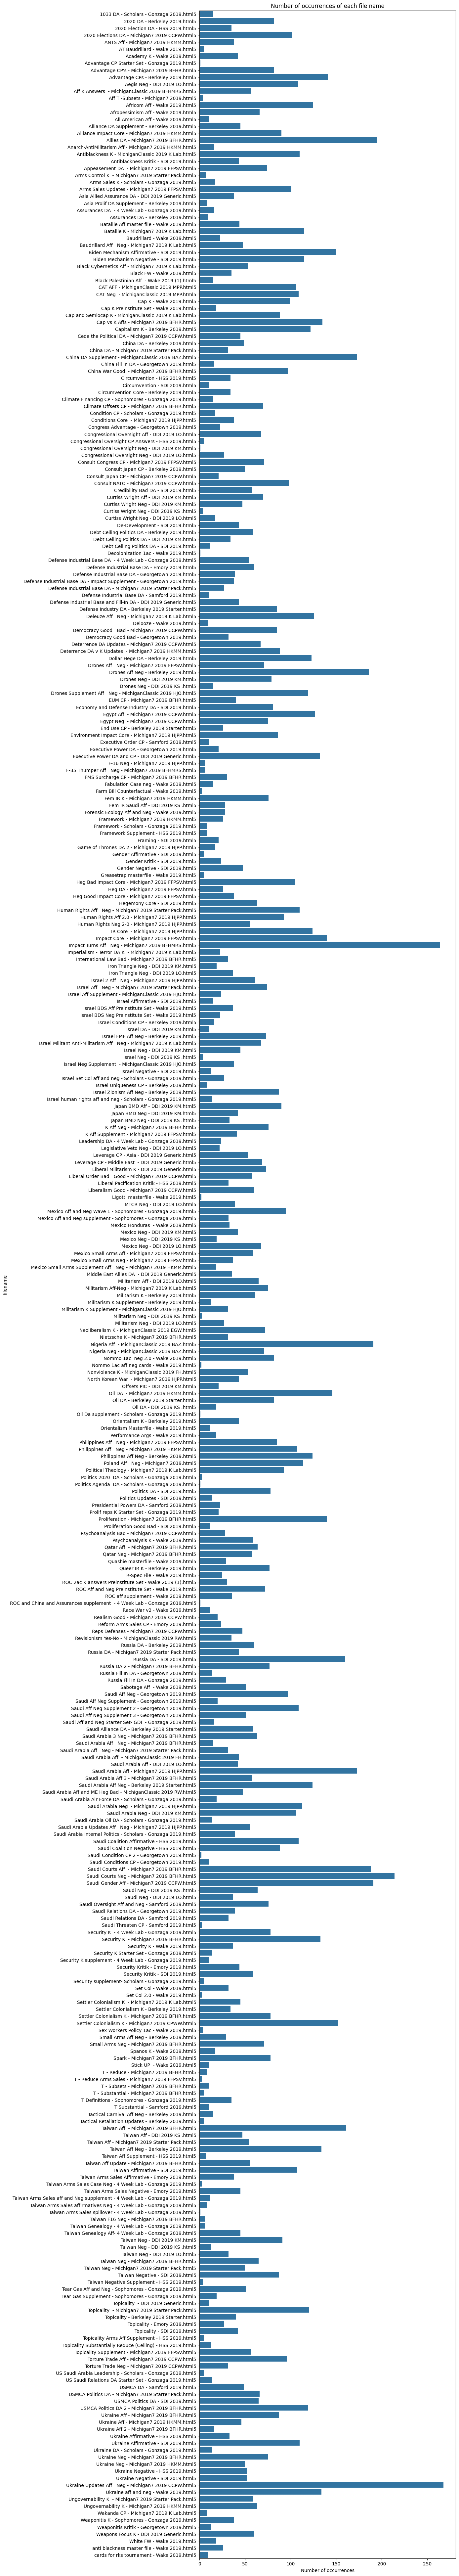

<Figure size 100000x100000 with 0 Axes>

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

df_keydate_counts = df_test['OriginalDebateFileName'].value_counts().sort_index().reset_index()
df_keydate_counts.columns = ['OriginalDebateFileName', 'count']

plt.figure(figsize=(10, 100))
sns.barplot(x='count', y='OriginalDebateFileName', data=df_keydate_counts, orient='h')
plt.title("Number of occurrences of each file name")
plt.xlabel("Number of occurrences")
plt.ylabel("filename")
plt.figure(figsize=(1000, 1000))

plt.show()


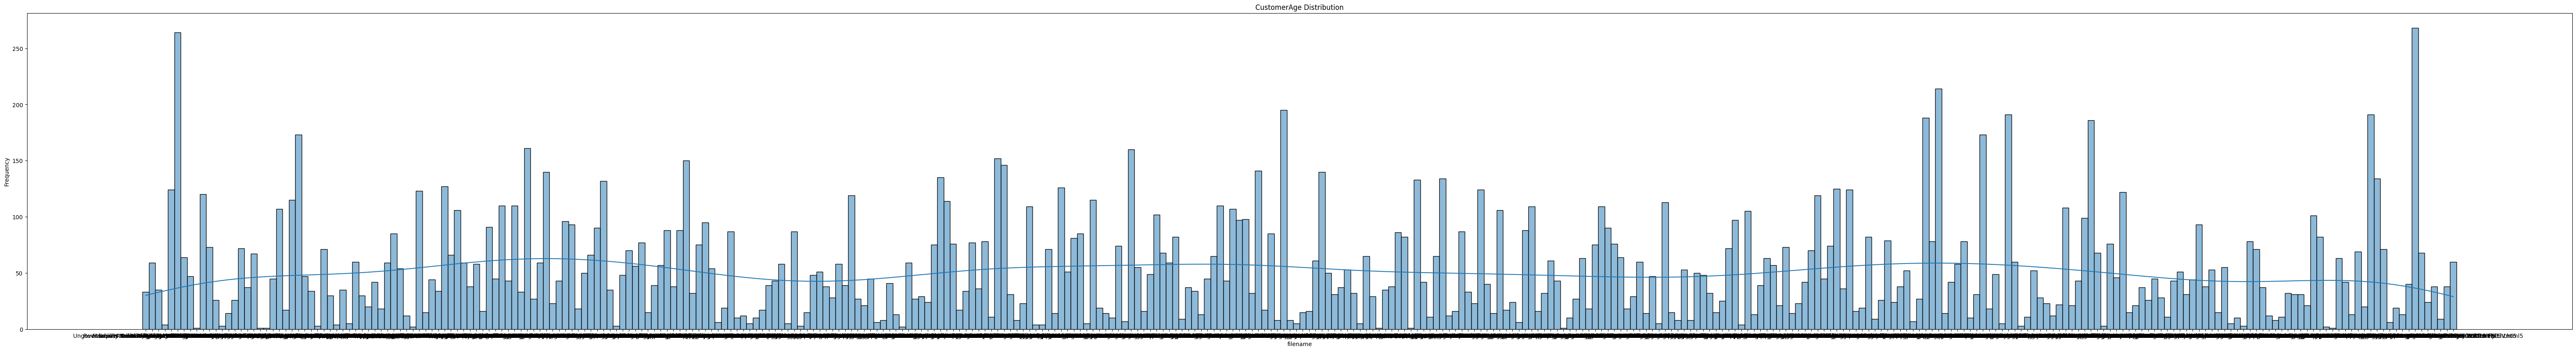

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot a histogram and kernel density estimate (KDE) of filename
plt.figure(figsize=(80, 10))

sns.histplot(df_test['OriginalDebateFileName'].dropna(), kde=True)
plt.title('File name Distribution')
plt.xlabel('filename')
plt.ylabel('Frequency')

plt.show()



In [ ]:
file_name_balance = df_test['OriginalDebateFileName'].value_counts()
print("\nFile Name balance:\n", file_name_balance)


File Name balance:
 Ukraine Updates Aff   Neg - Michigan7 2019 CCPW.html5                         268
Impact Turns Aff   Neg - Michigan7 2019 BFHMRS.html5                          264
Saudi Courts Neg - Michigan7 2019 BFHR.html5                                  214
Allies DA - Michigan7 2019 BFHR.html5                                         195
Nigeria Aff  - MichiganClassic 2019 BAZ.html5                                 191
                                                                             ... 
Congressional Oversight Neg - DDI 2019 KM.html5                                 1
Advantage CP Starter Set - Gonzaga 2019.html5                                   1
Taiwan Arms Sales spillover - 4 Week Lab - Gonzaga 2019.html5                   1
ROC and China and Assurances supplement  - 4 Week Lab - Gonzaga 2019.html5      1
Politics Agenda  DA - Scholars - Gonzaga 2019.html5                             1
Name: OriginalDebateFileName, Length: 364, dtype: int64


In [ ]:
import pandas as pd
import json
#to csv

df_test = pd.read_csv('debate2019.csv')

# Filter the dataframe to keep only the rows with the specified file name
filtered_df = df_test[df_test['OriginalDebateFileName'] == 'Ukraine Updates Aff   Neg - Michigan7 2019 CCPW.html5']

# Save the filtered dataframe to a new csv file
filtered_csv_path = 'Ukraine_text.csv'
filtered_df.to_csv(filtered_csv_path, index=False)

filtered_csv_path


'Ukraine_text.csv'

In [ ]:
import pandas as pd
import json
#to txt

df_test = pd.read_csv('debate2019.csv')

# Filter the dataframe to keep only the rows with the specified file name
filtered_df = df_test[df_test['OriginalDebateFileName'] == 'Ukraine Updates Aff   Neg - Michigan7 2019 CCPW.html5']

# Save the filtered dataframe to a new csv file
filtered_csv_path = 'filtered_database.csv'
filtered_df.to_csv(filtered_csv_path, index=False)


# Concatenate all the values in the 'Full-Document' column into a single text
Ukraine_text = '\n'.join(filtered_df['Full-Document'].astype(str))

# Save the concatenated text to a .txt file
text_file_path = 'Ukraine_text.txt'
with open(text_file_path, 'w') as file:
    file.write(Ukraine_text)

text_file_path




'Ukraine_text.txt'

This is what we get in terms of which subejcts appear most times, and specifically how many times:


First:
- Ukraine Updates Aff   Neg - Michigan7 2019 CCPW.html5                         
- Appears 268 times


Second:

- Impact Turns Aff   Neg - Michigan7 2019 BFHMRS.html5
- Appears 264 times

Third:
- Saudi Courts Neg - Michigan7 2019 BFHR.html5
-  Appears 214 times

Fourth:
- Allies DA - Michigan7 2019 BFHR.html5
- Appears 195 times         


Fifth:

- Nigeria Aff  - MichiganClassic 2019 BAZ.html5
- Appears 191 times

In [ ]:
# Look at how big the database with only the 5 subjects we chose before

df_mock = pd.read_csv('debate2019.csv')


# Get the 5 most recurrent filenames
top5_filenames = df_mock['OriginalDebateFileName'].value_counts().nlargest(5).index

# Filter the dataframe to include only the top 5 filenames
top5_df = df_mock[df_mock['OriginalDebateFileName'].isin(top5_filenames)]

# Calculate the total number of characters for the top 5 filenames
top5_chars = top5_df['Full-Document'].str.len().sum()

# Calculate the total number of characters for the entire 'Full-Document' column
total_chars = df_mock['Full-Document'].str.len().sum()

# Calculate the percentage of characters that the top 5 subjects represent
percent_top5_chars = (top5_chars / total_chars) * 100




In [ ]:
print("New databse represents",percent_top5_chars,
      "% of the original dataset, \nwhich is small "
      "enough for fine tuning that will cost us $", percent_top5_chars*120/100)

New databse represents 6.105831051190056 % of the original dataset, 
which is small enough for fine tuning that will cost us $ 7.326997261428067


#Structure data for extraction (final chatbot version)

Extract data from huggingface, and reduce filesize by only keeping the subjects that have more than 150 docs.

In [ ]:
# Install Git LFS
!apt-get install git-lfs

# Clone the entire repository
!git lfs clone https://huggingface.co/asaurasieu/debatebot

# Move into the repository directory

os.chdir('debatebot')

# Now you can read the file using pandas
df = pd.read_csv('debate2019.csv')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.2).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
          with new flags from 'git clone'

'git clone' has been updated in upstream Git to have comparable
speeds to 'git lfs clone'.
fatal: destination path 'debatebot' already exists and is not an empty directory.
Error(s) during clone:
git clone failed: exit status 128


In [ ]:
df = df[['Full-Document', 'OriginalDebateFileName']]  # Keep only necessary columns
# Count the occurrence of each filename
filename_counts = df['OriginalDebateFileName'].value_counts()

# Filter filenames that appear more than 1 time and up to 80 times
filtered_filenames = filename_counts[(filename_counts > 1) & (filename_counts <= 150)].index

# Filter the dataset based on these filenames
filtered_df = df[~df['OriginalDebateFileName'].isin(filtered_filenames)]

df= filtered_df[['OriginalDebateFileName','Full-Document']]


In [ ]:
df

,OriginalDebateFileName,Full-Document
255,Impact Turns Aff Neg - Michigan7 2019 BFHMRS...,The United States has traditionally regarded t...
256,Impact Turns Aff Neg - Michigan7 2019 BFHMRS...,Chinese or Russian non-nuclear strikes against...
257,Impact Turns Aff Neg - Michigan7 2019 BFHMRS...,The US nuclear forces modernization program ha...
258,Impact Turns Aff Neg - Michigan7 2019 BFHMRS...,Do not be alarmed by Russia's announcement of ...
259,Impact Turns Aff Neg - Michigan7 2019 BFHMRS...,“Whoever becomes the leader in this sphere wil...
...,...,...
18815,Ukraine Updates Aff Neg - Michigan7 2019 CCP...,WASHINGTON - The United States needs more fire...
18816,Ukraine Updates Aff Neg - Michigan7 2019 CCP...,"Last week, Michael Brendan Dougherty wrote a p..."
18817,Ukraine Updates Aff Neg - Michigan7 2019 CCP...,"President Obama's inaction after drawing a ""re..."
18818,Ukraine Updates Aff Neg - Michigan7 2019 CCP...,The State Department says the U.S. will provid...


New database schema next to inital one:

In [ ]:
from IPython.display import IFrame

# Embedding the diagram within an IFrame
display(IFrame(src='https://dbdiagram.io/e/65db79cb5cd0412774c38b95/65db7e895cd0412774c3b8b5', width=800, height=450))
